# Part I - Data Exploration and Predictive Modelling
Rodrigo Tiscareno

April 17, 2022

Prepared for the Udacity Data Analyst Nanodegree Final Project.

## Introduction

Heart Disease is the leading cause of death in the world. According to the CDC, heart disease is responsible for about 1 in 4 deaths in the United States and over $1 billion in daily government and organization expenditure. <sup>1, 2</sup> Despite advocacy for heart health and billions of dollars spent each year in heart disease awareness campaigns, diagnoses are expected to rise by a staggering 46% by 2046. <sup>2</sup>

The good news? Almost 80% of premature heart disease and stroke can be prevented through healthy behaviours.<sup>2</sup>  Personal health habits such as regular exercise, ample sleep time, and diet can all work towards preventing health-related diseases. 

Through this data analysis exercise, I want to explore the correlation of a handful of personal health factors towards a patient's heart condition and their body mass index and arrive at conclusions to how individuals' personal choices affect their health. 

My objectives are to:

- Visually explain the characteristics' contribution to heart health
- Create and deploy a classification algorithm to determine heart condition based on the given dataset's factors
- Understand which features hold the most significance when computing a predicted diagnosis.

I will be working with a Kaggle [dataset](https://link-url-here.org) with over 319, 795 patient records acquired from the CDC Government website. The Kaggle dataset was created by Kamil Pytlak. 

<sup>1  https://www.cdc.gov/

<sup>2  https://www.heart.org/

In [1]:
# Import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme()

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

%matplotlib inline

# Specifying default color for visualiations
default_color = sb.color_palette()[0]

import warnings
warnings.simplefilter("ignore")

## Preliminary Wrangling

### Feature Description

- HeartDisease: Binary variable of whether a patient has reported a case of heart disease or mydocardial infarction.


- BMI: Body Mass Index of patient.


- Smoking: Binary variable of whether a patient has smoked at least 100 cigarettes throughout their entire life.


- AlcoholDrinking: Binary Variable of whether a male patient is drinking more than 14 drinks per week or a female patient drinking more than 7 drinks per week.


- Stroke: Binary variable as to whether a patient has ever had a stroke.


- PhysicalHealth: How many days a patient has reported feeling unwell physically in the last 30 days.


- MentalHealth: How many days a patient has reported feeling unwell mentally in the last 30 days.


- DiffWalking: Binary variable of whether a patient has faced difficulty walking or climbing stairs.


- Sex: Gender of patient.


- AgeCategory: Categorical variable describing the age of the patient.


- Race: The patient's ethnicity.


- Diabetic: Binary variable of whether a patient is a diabetic.
- PhysicalActivity: Binary variable of whether a patient has reported doing physical activity in the last 30 days.


- GenHealth: Categorical variable describing the general health of a patient.


- SleepTime: How many average hours of sleep the patient receives in a 24-hour period.


- Asthma: Binary variable of whether a patient has been diagnosed with asthma. 


- KidneyDisease: Binary variable of whether a patient has been diagnosed with kidney disease. 


- SkinCancer: Binary variable of whether a patient has been diagnosed with skin cancer. 


In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [4]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


The BMI and SleepTime max's are unrealistic. 

After some digging [online](https://www.medicalnewstoday.com/articles/323586#bmi-categories), it seems it is possible for people to have a BMI of 80, but no more than that value. 

As for SleepTime, it doesn't seem possible for a patient to sleep for all the 24 hours in a day. 

Therefore, it would seem wise to cut the patients with a BMI over 80 from our dataset. To address the sleep time unrealistic values, we will assume that no patient could sleep for more than 20 hours in a day. 20 will the maximum threshold for this feature.

In [5]:
# Filtering all entries with BMI greater than 80.
df = df.loc[df['BMI'] < 80]

In [6]:
# Filtering all entries with SleepTime greater than 20.
df = df.loc[df['SleepTime'] <= 20]

In [7]:
df.shape

(319717, 18)

In [8]:
# Checking for imbalance in dataset in regards to the HeartDisease feature
df['HeartDisease'].value_counts()

No     292356
Yes     27361
Name: HeartDisease, dtype: int64

The datasets contains more records with patients without heart disease than patients with. We need to preserve proportionality in the dataset for the classification algorithms in the latter parts of the analysis.

In [9]:
# One Hot Encoding all binary values in dataset for machine learning computations
dfML = df.copy()
binary_variables = ['HeartDisease','Smoking', 'AlcoholDrinking', 'Stroke', 
                    'DiffWalking', 'DiffWalking', 'PhysicalActivity', 'Asthma', 
                    'KidneyDisease', 'SkinCancer', 'Diabetic']

for var in binary_variables:
    dfML[var] = pd.get_dummies(df[var]).drop('No', axis = 1).rename(columns = {'Yes':var})

### Structure of the Dataset

The dataset has 319, 795 observations and 18 features. 4 of the features are numeric and 14 are categorical. 

Of the categorical variables, there are 10 variables that are binary in nature and 4 that are strictly categorical. From the numerical features, there is a single continuous variable and 3 discrete variables.

### Main Features of Interest

The main features of interest in the dataset are the dependent variables - HeartDisease and BMI. Although BMI falls out of the scope of observing the effects of the other features on heart disease, it will add an extra layer to the analysis and allow us to also observe the effects of the features on a patient's general health.

All other features and their effects will be analyzed to their correlations in regards to these variables. Through this analysis, we want to observe which variables are correlated the most, and to what effect. By doing so, we can specifically point out a handful of features that are most significant in preventing heart disease.

The dataset includes many binary features - 10 total. While these may be useful in the predictive modelling, we will be focusing on visualizing the categorical and numerical data in the bivariate explorations, and leveraging the "hue" parameter to take the binary features into account. 

The features I am most curious on in how they interact with a patient's heart condition and their BMI are: sleep time, the effects of underlying conditions (diabetes, asthma, kidney disease, and skin cancer, and effects outside the patient's control (sex, race, and age).


### Feature Grouping for Further Analysis

There are 5 features in the dataset pertaining to other underlying medical conditions (diabetes, asthma, kidney disease, stroke history, and skin cancer). Once we tie the connection of pre-existing conditions to Heart Disease probability, it can open the door to other questions about a patient's existing health such as their perceived health condition, mental health, and physical health. 

All in all, I think the features can be grouped into four distinct groups for analysis. 

#### Patient Information
- Sex, Age, Race

#### Patient Habits
- Sleep time, smoking, alcohol consumption, physical activity

#### Patient Physical and Mental Health
- Physical health, mental health, difficulty walking/climbing stairs, (physical activity)

#### Patient Health History
- Stroke, diabetic, asthma, kidney disease, and skin cancer

Each category will be observed and evaluated as a whole in their connection to BMI and the probability of heart condition.


## Univariate Exploration

Let's first look at the distribution of our dependent, continous variable: BMI. 

#### BMI Distribution

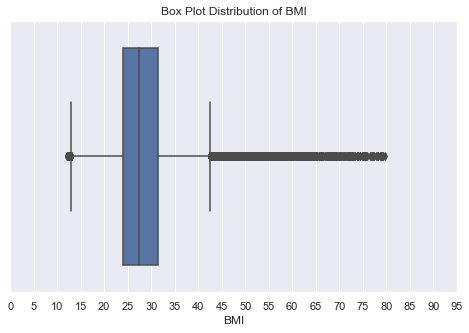

In [10]:
plt.figure(figsize = [8, 5])
sb.boxplot(x = df['BMI'])
plt.xlabel("BMI")
plt.title('Box Plot Distribution of BMI')
plt.xticks(np.arange(0, 100, 5))
plt.show()

The BMI distribution's range is centered to approximately 12.5% and 42.5%, with it's interquartile range being approximately 24% to 32%. There is a long tail after the IQR with multiple outliers beyond the 40% mark. 

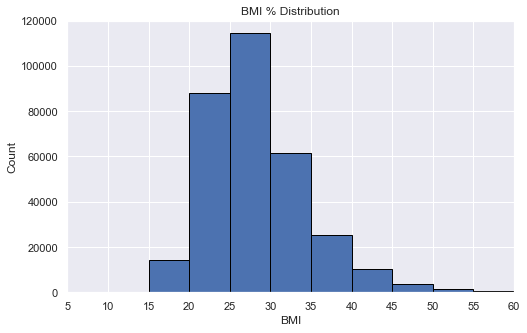

In [11]:
binsize = 5
bins = np.arange(0, df['BMI'].max() + binsize, binsize)

plt.figure(figsize = [8, 5])
df['BMI'].hist(bins = bins, edgecolor = 'black')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI % Distribution')
plt.xticks(bins)
plt.axis([5, 60, 0, 120000])
plt.show()

As noted previously, most patients have a BMI centered around 20%-35% with a few exemptions of those with a BMI above 45%. The majority of patients in our dataset have a BMI of 25%-30%, which is commonly classified as "overweight" by health standards. 

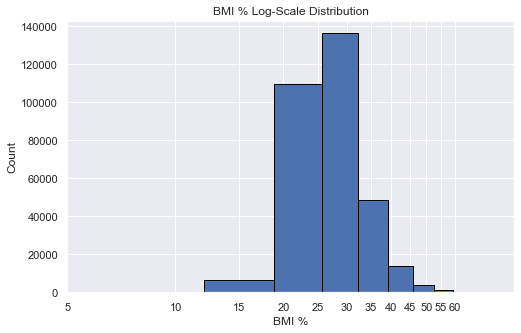

In [12]:
plt.figure(figsize = [8, 5])
plt.hist(data = df, x = 'BMI', edgecolor = 'black')
plt.xscale('log')
plt.xticks(np.arange(5, 65, 5), ['5', '10', '15', '20', '25', '30', '35', '40', '45', '50', '55', '60'])
plt.xlabel('BMI %')
plt.ylabel('Count')
plt.title('BMI % Log-Scale Distribution')
plt.show()

In order to observe a normal distribution with the BMI data which had a long, right tail, I applied a log-scale to the x-axis. The resulting visual is consistent with the observation above - most patients have a BMI around 20%-35%.

#### SleepTime Distribution

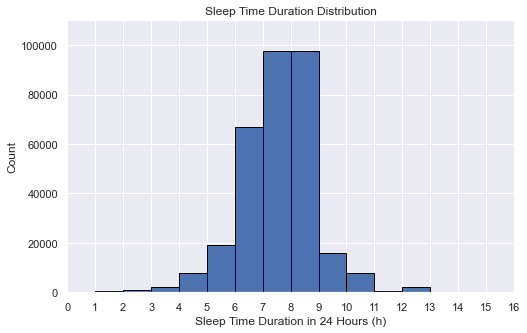

In [13]:
binsize = 1
bins = np.arange(0, df['SleepTime'].max() + binsize, binsize)

plt.figure(figsize = [8, 5])
df['SleepTime'].hist(bins = bins, edgecolor = 'black')
plt.xlabel('Sleep Time Duration in 24 Hours (h)')
plt.ylabel('Count')
plt.title('Sleep Time Duration Distribution')
plt.xticks(bins)
plt.axis([0, 16, 0, 110000])
plt.show()

The duration of sleep in a single day that patients receive is normally distributed and unimodal. Most values fall between 6-9 hours of total sleep. In the majority of cases, patients are receiving 7 or 8 hours of sleep in total.

#### Patient Information

In [14]:
# Shortening value in order to achieve cleaner visual.
df["Race"].replace({"American Indian/Alaskan Native": "Native American"}, inplace = True)
dfML["Race"].replace({"American Indian/Alaskan Native": "Native American"}, inplace = True)

In [15]:
age_order = ['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', 
'55-59', '60-64', '65-69', '70-74', '75-79', '80 or older']

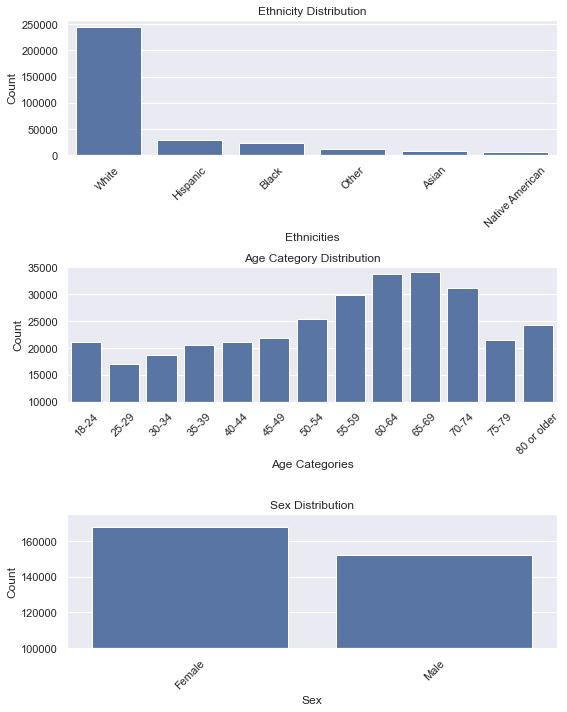

In [16]:
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = [8,10])

sb.countplot(data = df, x = 'Race', color = default_color, ax = ax[0], 
             order = df['Race'].value_counts().index)
ax[0].set_title('Ethnicity Distribution')
ax[0].set_xlabel('Ethnicities')
ax[0].set_ylabel('Count')

sb.countplot(data = df, x = 'AgeCategory', color = default_color, ax = ax[1],
            order = age_order)
ax[1].set_title('Age Category Distribution')
ax[1].set_xlabel('Age Categories')
ax[1].set_ylabel('Count')
ax[1].set_ylim(10000, 35000)

sb.countplot(data = df, x = 'Sex', color = default_color, ax = ax[2])
ax[2].set_title('Sex Distribution')
ax[2].set_xlabel('Sex')
ax[2].set_ylabel('Count')
ax[2].set_ylim(100000, 175000)

for axes in ax:
    axes.tick_params(rotation = 45, axis = 'x')

plt.tight_layout()
plt.show()

The patients studied are very balanced in terms of age and gender distribution. In terms of ethnicity, there is an imbalance with a large quantity of the white patients - perhaps because the studies were carried out in the United States. Many of the patients observed are within the age range of 60-70 years old. There is a steady increase in the patients tested who are 25 and older to about the age of 75 where there is a steady drop. The dataset is balanced in regards to sex, as there is an approximate 10,000 more female patients than male patients.

#### Patient Health History

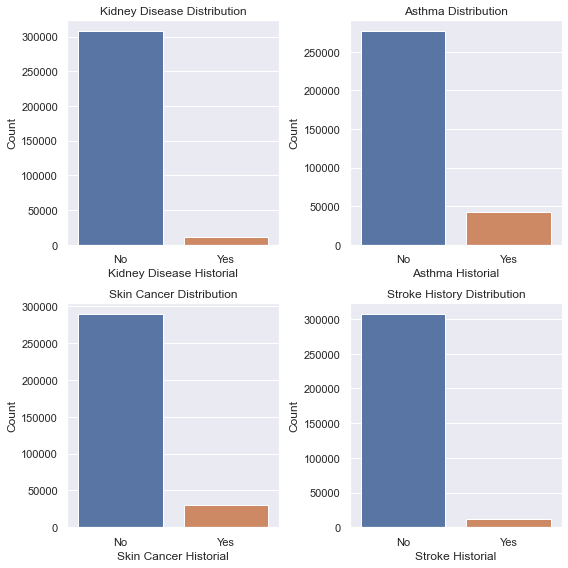

In [17]:
fig, ax = plt.subplots(nrows = 2,ncols = 2, figsize = (8,8))

order = ['No', 'Yes']

sb.countplot(data = df, x = 'KidneyDisease', ax = ax[0][0], 
             order = order)
ax[0][0].set_title('Kidney Disease Distribution')
ax[0][0].set_xlabel('Kidney Disease Historial')
ax[0][0].set_ylabel('Count')

sb.countplot(data = df, x = 'Asthma', ax = ax[0][1], 
            order = order)
ax[0][1].set_title('Asthma Distribution')
ax[0][1].set_xlabel('Asthma Historial')
ax[0][1].set_ylabel('Count')

sb.countplot(data = df, x = 'SkinCancer', ax = ax[1][0],
            order = order)
ax[1][0].set_title('Skin Cancer Distribution')
ax[1][0].set_xlabel('Skin Cancer Historial')
ax[1][0].set_ylabel('Count')

sb.countplot(data = df, x = 'Stroke', ax = ax[1][1],
            order = order)
ax[1][1].set_title('Stroke History Distribution')
ax[1][1].set_xlabel('Stroke Historial')
ax[1][1].set_ylabel('Count')
        
    
plt.tight_layout()
plt.show()

There is a minimal amount of patients with pre-existing health conditions as noted from the graphs above. The most common, pre-existing conditions are asthma and skin cancer. 

## Bivariate Exploration

To begin the bivariate exploration, we will start analyzing the BMI feature with a patient's heart health.

We can imagine that a patient will exhibit a higher probability of heart disease with a higher BMI. However, we want to observe just how significant this difference is, and whether the distribution of BMI is consistent for both conditions of patients.

#### What are the effects of Body-Mass Index on the probability of Heart Disease?

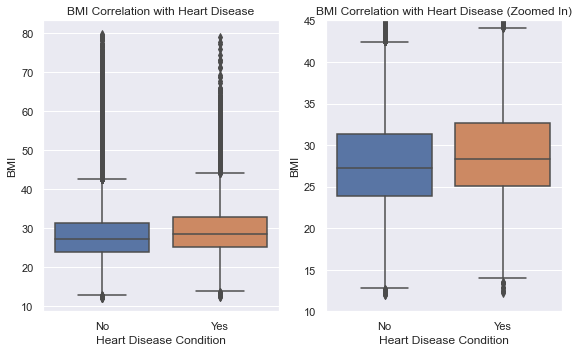

In [18]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (8,5))
sb.boxplot(x = 'HeartDisease', y = 'BMI', data = df, ax = ax[0])
ax[0].set_xlabel('Heart Disease Condition')
ax[0].set_title('BMI Correlation with Heart Disease')

sb.boxplot(x = 'HeartDisease', y = 'BMI', data = df, ax = ax[1])
ax[1].set_xlabel('Heart Disease Condition')
ax[1].set_title('BMI Correlation with Heart Disease (Zoomed In)')
plt.ylim(10, 45)

plt.tight_layout()
plt.show()

There is a slight difference in the interquartile range, median, and mean of BMI values of patients with and without heart disease. Albeit this difference is minimal as per the plot, even a 2%-3% difference can be significant. From these distributions, we can conclude that BMI is positively correlated with a patient's likelihood of heart disease.

We will continue our analysis by exploring the correlation between a patients' personal information with BMI and heart disease. As previously mentioned in the analysis, the features pertaining to a patient's personal information are ethnicity, age-category, and general health.

#### Which ethnicities are most vulnerable to heart disease? Can we point this additional probability to a higher BMI or poorer health habits?

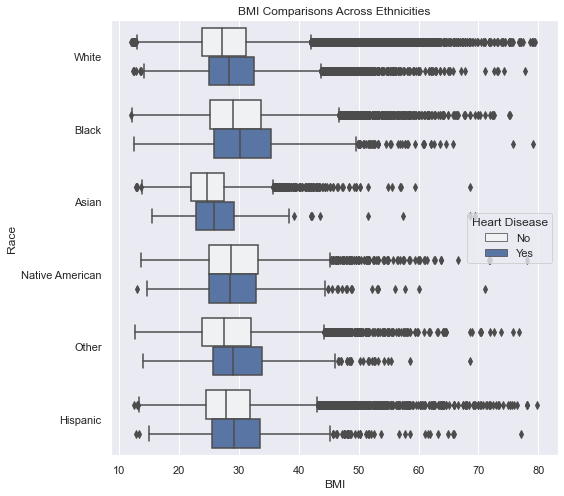

In [19]:
plt.figure(figsize = (8, 8))

sb.boxplot(x = "BMI", y = "Race", data = df, color = default_color, hue = 'HeartDisease')
plt.title('BMI Comparisons Across Ethnicities')
plt.legend(title = 'Heart Disease')
plt.show()

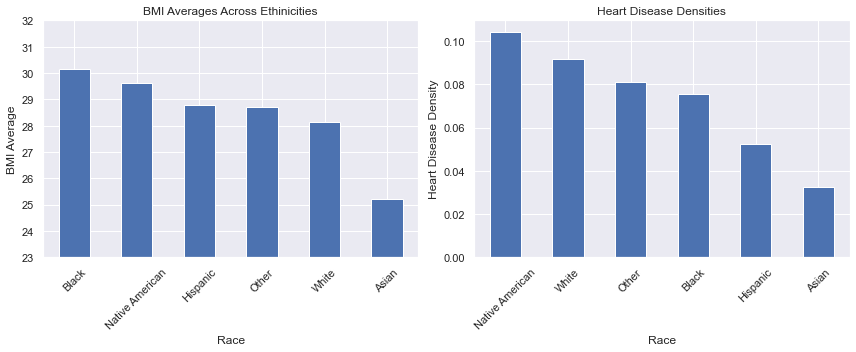

In [20]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))

# Utilizing our one hot encoded dataframe for heart disease density 
temp = dfML.groupby('Race')[['BMI', 'HeartDisease']].mean()

temp.sort_values(by = 'BMI', ascending = False).plot.bar(y = 'BMI',rot = 45, ax = ax[0], legend = False)
ax[0].set_ylim(23, 32)
ax[0].set_ylabel('BMI Average')
ax[0].set_title('BMI Averages Across Ethinicities')

temp.sort_values(by = 'HeartDisease', ascending = False).plot.bar(y = 'HeartDisease',rot = 45, 
                                                                  ax = ax[1], legend = False)
ax[1].set_ylabel('Heart Disease Density')
ax[1].set_title('Heart Disease Densities')

plt.tight_layout()
plt.show()

Once again, from the boxplot, it is evident that BMI plays a key role in the probability of heart disease. Taking this into account, I took the mean of the ethnicities groups and compared their average BMI against each other. I also computed the density of positive heart disease cases with ethinicities into account and plotted the graphs side by side rather than in a single plot due to the nature of their scale. 

The groups with the higher BMI means were the Black, Native American, and Hispanic ethnicities. However, a higher BMI didn't necessarily constitute with a higher heart disease density. Native Americans did exhibit a higher probability of heart disease, followed by the White and Other ethnicities. The Black and Hispanic ethnicities were only fourth and fifth respectively across the board. Heart Disease by ethnicity could be a case of inheritance, however, as seen by the lower end of the spectrum, the Asian ethnicity had a lower BMI average which constituted with a lower density of heart disease. This strengthens our conclusion that BMI plays a significant role in the probability of heart disease.

#### Does the sex of a patient affect their BMI or risk of heart disease? 

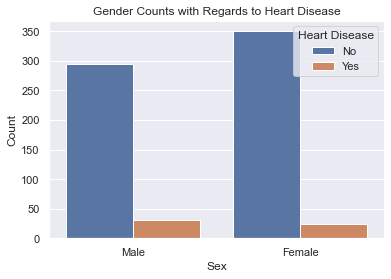

In [270]:
sb.countplot(x = 'Sex', data = df.sample(700) , hue = 'HeartDisease')
plt.title('Gender Counts with Regards to Heart Disease')
plt.ylabel('Count')
plt.legend(title = 'Heart Disease')
plt.show()

There isn't a significant difference in our sample between gender in terms of heart disease.

#### How does the general, current health of a patient translate affect BMI and the probability of heart disease? How does physical activity compare to a patient's perception of their own health?

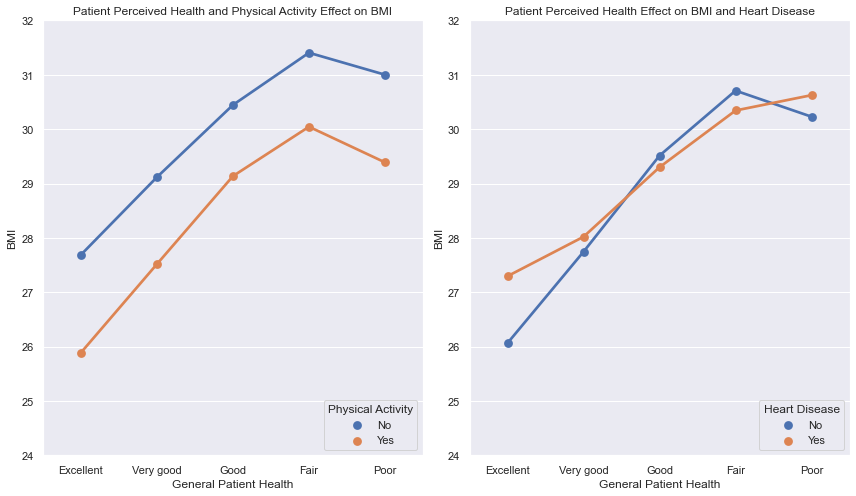

In [198]:
temp = df.groupby(['GenHealth', 'PhysicalActivity']).mean().reset_index()

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 7))

sb.pointplot(x = 'GenHealth', y = 'BMI', hue = 'PhysicalActivity', data = temp, kind = 'bar', 
              order = ['Excellent','Very good', 'Good', 'Fair', 'Poor'], ax = ax[0])
ax[0].set_ylim(24, 32)
ax[0].set_xlabel('General Patient Health')
ax[0].set_title('Patient Perceived Health and Physical Activity Effect on BMI')
ax[0].legend(loc = 'lower right', title = 'Physical Activity')

temp = df.groupby(['GenHealth', 'HeartDisease']).mean().reset_index()

sb.pointplot(x = 'GenHealth', y = 'BMI', hue = 'HeartDisease', data = temp, kind = 'bar', 
              order = ['Excellent','Very good', 'Good', 'Fair', 'Poor'], ax = ax[1])
ax[1].set_ylim(24, 32)
ax[1].set_xlabel('General Patient Health')
ax[1].set_title('Patient Perceived Health Effect on BMI and Heart Disease')
ax[1].legend(loc = 'lower right', title = 'Heart Disease')

plt.tight_layout()
plt.show()

Let's talk about the first plot. On average, patients do a jusftified job at rating their perceived health by their physical activity as denoted by the first figure explored. As the health rating drops, the BMI climbs, which is an indicator that physical activity is also dropping(one can expect BMI to increase as a patient performs less physical activity). Patients who have not engaged in physical activity during the last 30 days are subject to a dramatic increase in their BMI and perceived health rating. A lack of physical activity leads to a lower perception of one's own health. Those who do not partake in physical activity, even with perceived excellent physical health, average about 27% of a BMI rating, equivalent to an overweight rating by the CDC.

In the second plot, we confirm patient health's relationship with the a patien'ts heart condition. Those with no heart disease, in most of the occurrences, fall below the BMI rating of those patients with heart disease. 

Physical activity is a crucial factor in determining one's own health and taking care of one's heart from disease. Let's continue to explore how patient's can relate their perceived mental and physical health with their fitness activity. 

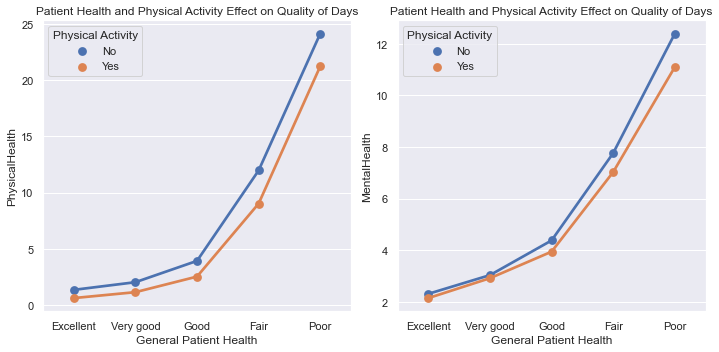

In [199]:
temp = df.groupby(['GenHealth', 'PhysicalActivity']).mean().reset_index()

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))

sb.pointplot(x = 'GenHealth', y = 'PhysicalHealth', hue = 'PhysicalActivity', data = temp, 
             kind ='bar', order = ['Excellent','Very good', 'Good', 'Fair', 'Poor'], ax=ax[0])
ax[0].set_title('Days out of 30 Patients Report Poor Physical Health')
ax[0].set_xlabel('General Patient Health')
ax[0].set_title('Patient Health and Physical Activity Effect on Quality of Days')
ax[0].legend(title = 'Physical Activity')

sb.pointplot(x = 'GenHealth', y = 'MentalHealth', hue = 'PhysicalActivity', data = temp, kind = 'bar', 
              order = ['Excellent','Very good', 'Good', 'Fair', 'Poor'], ax=ax[1])
ax[1].set_title('Days out of 30 Patients Report Poor Mental Health')
ax[1].set_xlabel('General Patient Health')
ax[1].set_title('Patient Health and Physical Activity Effect on Quality of Days')
ax[1].legend(title = 'Physical Activity')

plt.tight_layout()
plt.show()

As confirmed previously, we observe the impact of physical activity on both a patient's physical and mental health and image. The poorer the perceived patient health, the greater the amount of days from the past 30 that the patient reports poor health in both categories. Despite having the same ratings, patients who perform physical activity, on average, always report fewer poor mental and physical health days.

From our analysis on perceived physical health on BMI and the probability of heart disease, I want to take a closer look at a patient's reported health during the least 30 days. The question I want to answer is how a patient perceives their mental and physical health during their last 30 days in accordance to their BMI. Are patients aware of their poor physical state and does BMI play a large role in this self-image?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


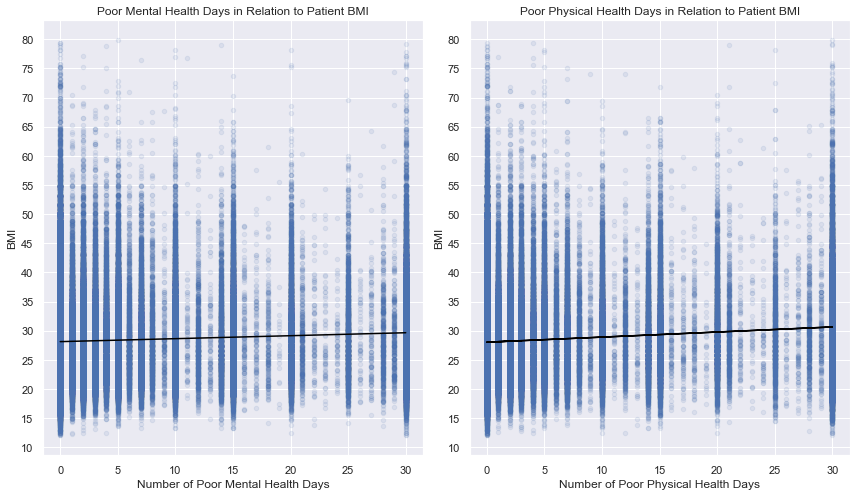

In [200]:
fig, ax = plt.subplots(1, 2, figsize = (12, 7))

x = df['MentalHealth']
y = df['BMI']
fit = np.polyfit(x, y, 1)
ax[0].plot(x,np.polyval(fit, x), "black")

df.plot.scatter(x = 'MentalHealth', y = 'BMI', ax = ax[0], alpha = 0.1)
ax[0].set_xlabel('Number of Poor Mental Health Days')
ax[0].set_title('Poor Mental Health Days in Relation to Patient BMI')
ax[0].set_yticks(np.arange(10, 85, 5))

x = df['PhysicalHealth']
fit = np.polyfit(x, y, 1)
ax[1].plot(x,np.polyval(fit, x), "black")

df.plot.scatter(x = 'PhysicalHealth', y = 'BMI', ax = ax[1], alpha = 0.1)
ax[1].set_xlabel('Number of Poor Physical Health Days')
ax[1].set_title('Poor Physical Health Days in Relation to Patient BMI')
ax[1].set_yticks(np.arange(10, 85, 5))


plt.tight_layout()
plt.show()

There are many values from both categories that are multiples of 5 and lie in the extrema of the spectrum. We can conclude that many patients opted to think of this variable categorically, with 0 and 30 representing the ends of the spectrum and the multiples of 5's being the categories that form the levels. All in all, most patients with a high BMI suffered a higher amount of negative mental and physical health days. As seen from the best-fit line on both graphs, as BMI increases, so do the number of perceived negative days. BMI had the greatest impact on the addition of poor negative days, as observed by a steeper slope in the best-fit line compared to the mental health days line. 

#### How is patient BMI influenced as patients age? At what age are changes the most frequent? 

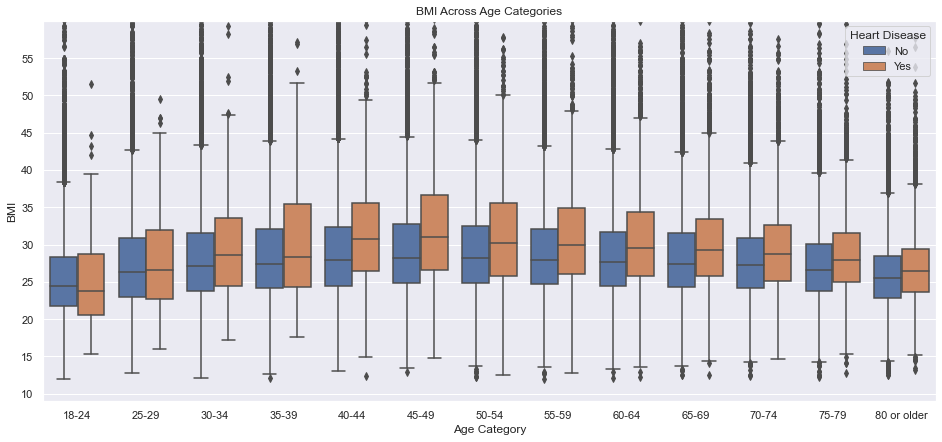

In [201]:
plt.figure(figsize = (16, 7))
sb.boxplot(x = "AgeCategory", y = "BMI", data = df, hue = 'HeartDisease', order = age_order)
plt.xlabel('Age Category')
plt.title('BMI Across Age Categories')
plt.ylim(9, 60)
plt.yticks(np.arange(10, 60, 5))
plt.legend(loc = "upper right", title = 'Heart Disease')
plt.show()

It can be observed that there exists a general increase in BMI from ages 18-45 and a general decrease from ages 45-80 as per the IQR distributions. The fluctuations are minimal, as the median line is inline and hovering around 25%. The most signficant observation from the graphic is the difference in BMI across all ages of patients with and without heart disease. We can once again observe the effect of a higher BMI with the probability of heart disease. 

#### Does the average sleep time of a patient affect their body-mass index? To what effect?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


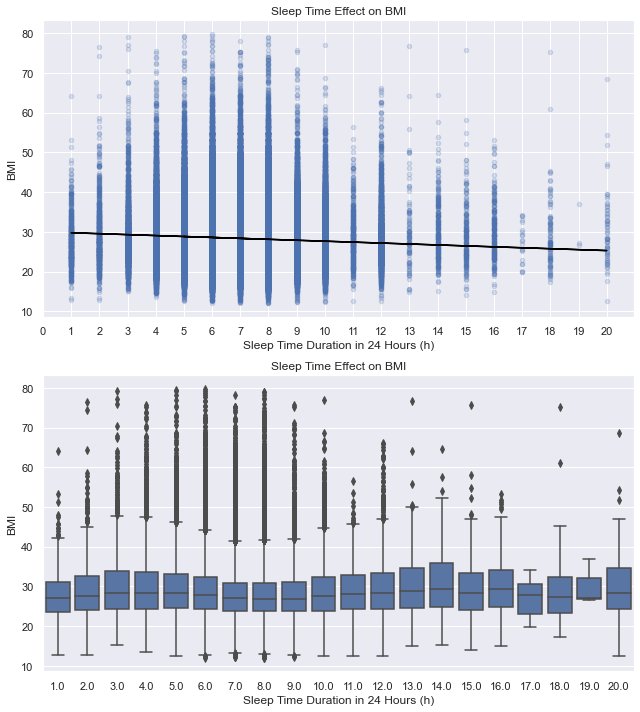

In [202]:
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (9, 10))

bins = np.arange(0, 21)

x = df['SleepTime']
y = df['BMI']

fit = np.polyfit(x, y, 1)

ax[0].plot(x,np.polyval(fit, x), "black")

df.plot.scatter(x = 'SleepTime',y = 'BMI', ax = ax[0], alpha = 0.2)
ax[0].set_xlabel('Sleep Time Duration in 24 Hours (h)')
ax[0].set_ylabel('BMI')
ax[0].set_title('Sleep Time Effect on BMI')
ax[0].set_xticks(np.arange(0, 21, 1))

sb.boxplot(x = 'SleepTime',y = 'BMI', data = df, ax = ax[1], color = default_color)
ax[1].set_xlabel('Sleep Time Duration in 24 Hours (h)')
ax[1].set_ylabel('BMI')
ax[1].set_title('Sleep Time Effect on BMI')

plt.tight_layout()
plt.show()

There is a slightly negative correlation between sleep time and BMI as represented by the best-fit line. Although the interquartile ranges and medians appear similar, lower sleep time durations from 3-8 hours consist of higher BMI outliers than higher ranges of 9-12. This can serve to indicate that patients with a sleep range of within 3 to 10 hours tend to have a higher BMI than those with a a higher amount of sleep.

#### As people age, do they tend to increase the amount of sleep they receive? How does this affect their general health?

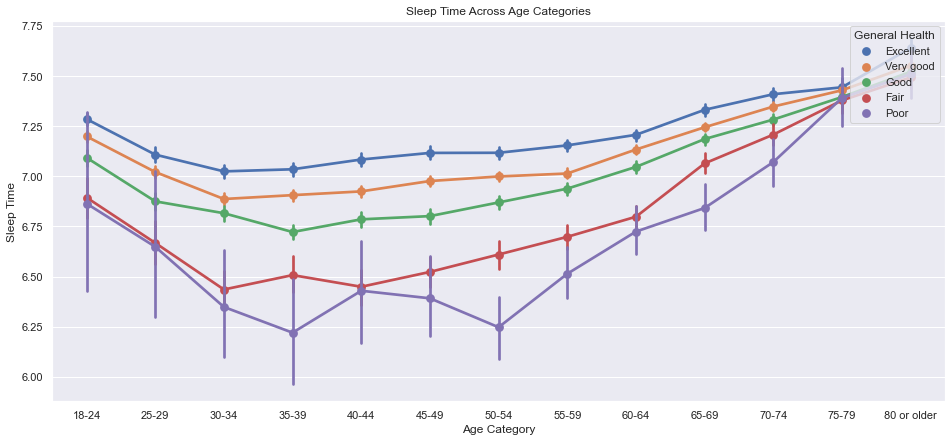

In [203]:
plt.figure(figsize = (16, 7))
hue_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
sb.pointplot(x = "AgeCategory", y = "SleepTime", data = df,hue = 'GenHealth', order = age_order, 
             hue_order = hue_order)
plt.xlabel('Age Category')
plt.ylabel('Sleep Time')
plt.title('Sleep Time Across Age Categories')
plt.legend(loc = "upper right", title = 'General Health')

plt.show()

There are a two main observations to note from the above plot. The first is the staggering difference that sleep time does to a patient's general health. The categories follow their ordinal order from excellent to poor as sleep time decreases. The second observation is the fluctuation of sleep time as a patient progresses through life. From 18-30, they start with a substantial amount of sleep until they dip from ages 30-50 before recovering at ages 50 and above. This can easily be traced to the societal tendency for adults to receive less sleep than young adults or seniors. It is in this age that we also see the most difference in sleep time between the different general health ratings. From the plot, it can also be concluded that the sweet spot for excellent general health is +7 hours.

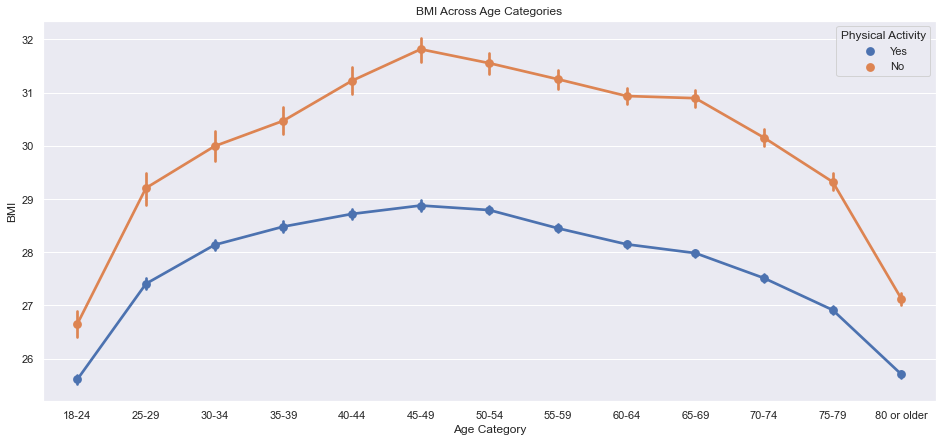

In [204]:
plt.figure(figsize = (16,7))
hue_order = ['Excellent', 'Very good', 'Good', 'Fair', 'Poor']
sb.pointplot(x = "AgeCategory", y = "BMI", data = df,hue = 'PhysicalActivity', order = age_order)
plt.xlabel('Age Category')
plt.ylabel('BMI')
plt.title('BMI Across Age Categories')
plt.legend(loc = "upper right", title = 'Physical Activity')

plt.show()

Here is a similar plot to the one comparing BMI with age. This plot however highlights the significance of physical activity to lowering BMI across the range of ages. There is a substantial gap in BMI in ages 40 to 75. Physical activity in these ages is crucial for preventing a high BMI and lowering risk of heart disease. It's also significant to note how a BMI of +30% is labelled as the threshold for obesity by the CDC. On average, most adults who haven't performed physical activity in the last 30 days hit this threshold, which serves as a huge indicator for their probability of heart disease.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Throughout the bivariate part of the investigation we explored how patient information and habits can shape both BMI and the likelihood of heart disease. We first established BMI as a dependent variable alongside heart disease by confirming its positive correlation with the probability of heart disease. A higher BMI simply increases the probability of heart disease. Once this was established, we first explored age and race in relation to these variables.

We observed that certain ethnicities did have a higher BMI than others but it did not necessarily correlate with a higher likelihood of heart disease. The only correlation that existed was with the Asian ethnicity, where they exhibited a significantly lower BMI value which correlated with their signifcantly lower chance of heart disease.

Next up, we took a look at the impact of physical activity. We compared physical activity to a patient's perceived health levels, perceived health rating, and BMI. There was a strong relationship with a patient's physical activity with a lowered BMI rating, an increased, positive health image, and most importantly, heart disease.

Finally, we concluded the bivariate exploration with additional insight on patient sleep time and age cateogory. Sleep time did play an important role in lowering BMI and heart disease. The more sleep a patient receives, the better their perceived health, BMI, and risk of heart disease.


## Multivariate Exploration

To begin, we want to explore the correlation between all variables in the dataset. We will leverage panda's .corr method to configure the numeric relationships between variables.

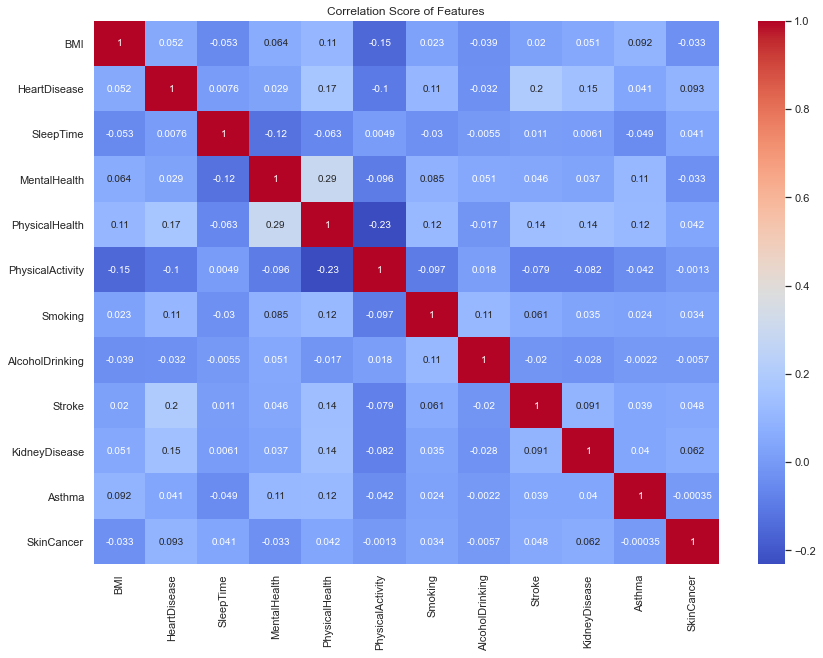

In [205]:
corr_variables = ['BMI', 'HeartDisease', 'SleepTime', 'MentalHealth', 
                  'PhysicalHealth', 'PhysicalActivity', 'Smoking', 'AlcoholDrinking', 
                  'Stroke', 'KidneyDisease', 'Asthma', 'SkinCancer']
plt.figure(figsize = (14,10))
sb.heatmap(dfML[corr_variables].corr(),cmap = 'coolwarm', annot = True)
plt.title('Correlation Score of Features')
plt.show()

Taking a look at the BMI row, there aren't many features that have a strong correlation. The features with the highest correlation score are a patient's physical health and pre-existing medical conditions such as having a history with stroke incidents. There are other correlations that stand out. Something we haven't touched on in this analysis is the correlation between heart disease and a patient's history with stroke. With a rating of 0.2, a patient's history with stroke can be directly impacting future or current risk of heart disease. It was also interesting to note the connection between the mental health and physical health features which were closely correlated. It can be said that if a patient feels good physically, they have a high chance of having a healthy mental state as well. The significance of physical health can be further strengthened by the visual as well. Being highly correlated with stroke, kidney disease, asthma, mental health, and heart disease, our conclusion that physical health is the most siginficant feature to affect heart disease stands.

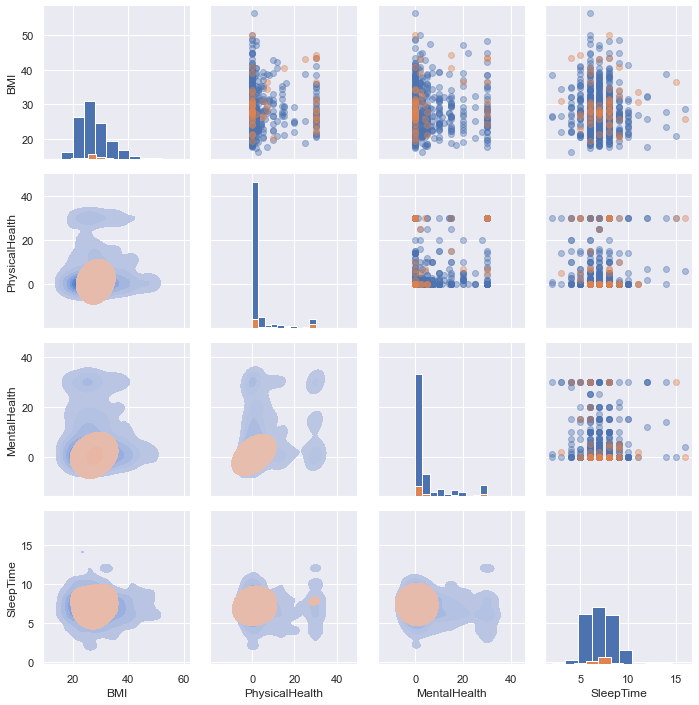

In [206]:
g = sb.PairGrid(df.sample(750), hue = 'HeartDisease')
g.map_diag(plt.hist)
g.map_upper(plt.scatter, alpha = 0.4)
g.map_lower(sb.kdeplot, shade = True)
plt.show()

We can confirm that most patients treated the mental and physical health days as a categorical variable in the sense that they selected either extrema or a multiple of 5. From the physical health plots, most patients that suffered many poor physical days also had a high BMI value. From our sample, the same can't be said for mental health days - although this feature, as previously mentioned, is highly correlated with the physical activity feature. 

We want to go forth now to answer an important question posed at the beginning of the analysis - which features are most crucial for minimizing the risk of heart disease. To answer this question, we will leverage a random forest classification model to determine the significance in each of our features in the detection of heart disease.

#### Which features are most siginficant for minimizing the risk of heart disease? 

To compute the random forest classifier, we will first balance our data to include the same number of patients with heart disease than with. We will be using the SMOTE technique to oversample our data and create additional entries for our minority class. The SMOTE technique creates additional entries by leveraging the K-Nearest Neighbours Algorithm to add synthetic samples to the data.

In [207]:
# One Hot Encoding categorical variables
categorical_vars = ['Sex', 'AgeCategory', 'Race','GenHealth']
new_cols = []
for var in categorical_vars:
    new_cols = pd.get_dummies(dfML[var])
    dfML = pd.concat([dfML, new_cols], axis = 1)
    dfML.drop(columns = [var], inplace=True)

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Diabetic',
       'PhysicalActivity', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'Female', 'Male', '18-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79',
       '80 or older', 'Asian', 'Black', 'Hispanic', 'Native American', 'Other',
       'White', 'Excellent', 'Fair', 'Good', 'Poor', 'Very good'],
      dtype='object')

In [209]:
# Defining input and output variables
X = dfML.drop('HeartDisease', axis=1)
y = dfML['HeartDisease']

In [211]:
# Performing Synthetic Minority Oversampling Technique to balance data
# pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm)

RandomForestClassifier()

#### Random Forest Algorithm

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

In [219]:
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     73390
           1       0.93      0.91      0.92     72788

    accuracy                           0.92    146178
   macro avg       0.92      0.92      0.92    146178
weighted avg       0.92      0.92      0.92    146178



In [21]:
plt.figure(figsize = (10, 10))
importance = pd.Series(rfc.feature_importances_,index = dfML.drop('HeartDisease', axis = 1).columns)
importance.nlargest(10).plot(kind = 'bar', rot = 45)
plt.title('Feature Importance to Heart Disease Prediction')
plt.xlabel('Feature')
plt.ylabel('Feature Significance')
plt.show()

NameError: name 'rfc' is not defined

<Figure size 720x720 with 0 Axes>

#### Logistic Regression Algorithm

In [236]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

              precision    recall  f1-score   support

           0       0.84      0.85      0.84     73390
           1       0.85      0.84      0.84     72788

    accuracy                           0.84    146178
   macro avg       0.84      0.84      0.84    146178
weighted avg       0.84      0.84      0.84    146178



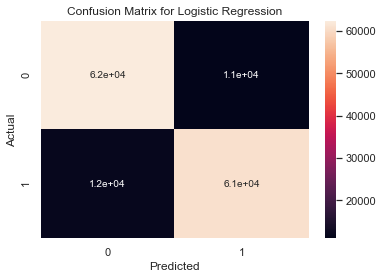

In [259]:
pred = model.predict(X_test)
print(classification_report(y_test, pred))
sb.heatmap(confusion_matrix(y_test,pred),annot=True)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

The random forest classification model surpassed the logistic regression model in accuracy by a staggering 8%. The random forest feature importance analysis also provided a great amount of insight into which were most significant in reducing the risk of heart disease. As we've explored in previous parts of the analysis, BMI, sleep time, physical and mental health, combined with general physical activity play a hugely important role in determining a patient's heart condition.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

In the multivariate portion of the investigation, we were able to definitively determine the top features attributing to the prediction of a patient's heart condition. We were able to confirm the large degree of effect of the BMI, physical health and activity, and sleeptime features to predicting heart-disease. We also observed a new insight which was how the number of poor physical days was directly linked to a high BMI - highlighting the effect of a high BMI with self-image. In addition, with the correlation heatmap, we were notice how previous experiences with stroke were relatively tied to future diagnosis of heart disease.

## Conclusions

Heart Disease is a preventable disease. There are a multitude of ways to reduce one's risk of heart disease, all starting with practicing physical activity and looking after your physical one's Body-Mass Index. Analyzing the effect of different factors such as to patient information, pre-existing conditions, and habits to heart disease has been an illuninating practice. All the things one was taught about looking after one's diet, sleep, and physical health have all come into fruition in the form of the conclusions we were able to form. Personally, this analysis has opened by eyes into the true importance of maintaining a healthy physical state as I age, to minimize the risk of all diseases, not limited to heart disease.

The dataset we explored was one extracted from census data collected by the CDC organization. It contained patient information, patient habitual data, and patient pre-existing conditions. From the 319, 717 patients recorded in the dataset, 9% were diagnosed with heart disease. Our objective in this analysis was to pinpoint correlations and trends in the data to configure the features provided and determine their impact in the diagnosis. 

We started the analysis comparing a patient's BMI with their risk of heart disease. The correlation was evident - BMI was positively connected with a higher risk of heart disease. We therefore used BMI as an additional dependent variable to compare against other features. We moved on to finding connections between a patient's information such as race, gender, and age group to their risk of heart disease. We found that a patient's race did not constitute a higher BMI or chance of heart disease. However, there was one specific ethnicity, the Asian ethnicity, that exhibited a substantially lower BMI average value which did correlate to it's low probability of heart disease. While gender did not entirely affect a patient's probability of heart disease, age category did have a profound effect. Age Category affected physical activity, which affected the general health of patients. Physical activity and general health were seen as significant features in increasing or decreasing BMI, which in turn, affects the risk of heart disease. To conclude our analysis, we observed the role of sleep time against BMI and concluded that a higher sleep time slightly reduce's a patient's BMI.

We finished our multivariate analysis with analyzing the significance of each feature in predicting heart disease in a random forest algorithm. We found that BMI, sleep time, and physical health were the leading features that led to determining heart disease. Mental health and physical activity were honourable mentions, although one can imagine physical activity increasing one's physical health.